In [10]:
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('Hurricane.csv')

In [12]:
print(df.head())

                           Name  Season               Month  \
0                  Hurricane #3    1853   August, September   
1  "1856 Last Island Hurricane"    1856              August   
2                  Hurricane #6    1866  September, October   
3                  Hurricane #7    1878  September, October   
4                  Hurricane #2    1880              August   

   Max. sustained winds(mph)  Minimum pressure(mbar)  
0                        150                     924  
1                        150                     934  
2                        140                     938  
3                        140                     938  
4                        150                     931  


In [14]:
df.columns = ['Name', 'Season', 'Month', 'mph', 'mbar']

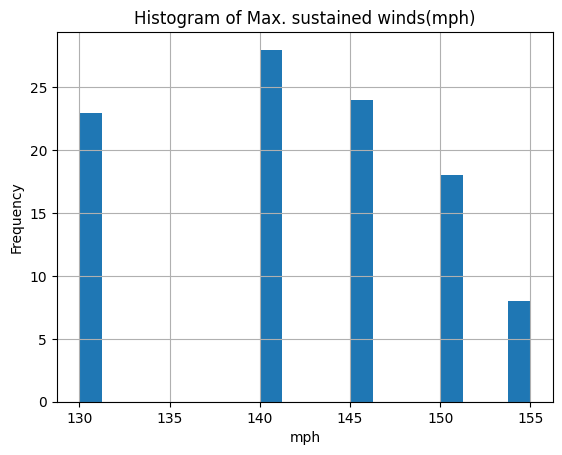

In [15]:
df['mph'].hist(bins=20)
plt.xlabel('mph')
plt.ylabel('Frequency')
plt.title('Histogram of Max. sustained winds(mph)')
plt.show()

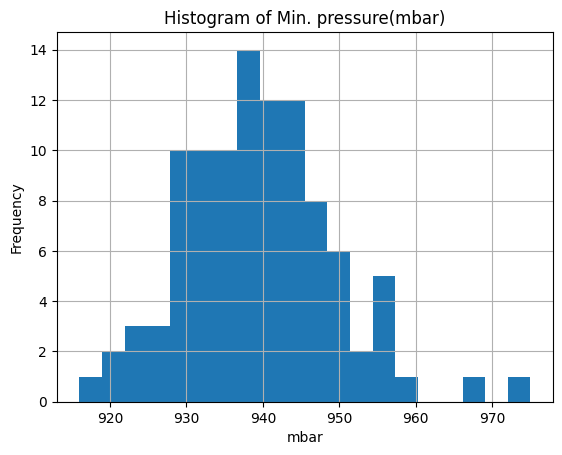

In [17]:
df['mbar'].hist(bins=20)
plt.xlabel('mbar')
plt.ylabel('Frequency')
plt.title('Histogram of Min. pressure(mbar)')
plt.show()

### (a) With a 1% level of significance conduct t-test for correlation coefficient between “Max. sustained winds(mph)” and “Minimum pressure(mbar)”.

In [16]:
# Calculating mean
mean_mph = df['mph'].mean()
mean_mbar = df['mbar'].mean()

print(f"Mean of Max Sustained Winds: {mean_mph}")
print(f"Mean of Minimum Pressure: {mean_mbar}")

# Calculating covariance
covariance = df[['mph', 'mbar']].cov().iloc[0, 1]

print(f"Covariance: {covariance}")

# Calculating standard deviation
std_dev_mph = df['mph'].std()
std_dev_mbar = df['mbar'].std()

print(f"Standard Deviation of Max Sustained Winds: {std_dev_mph}")
print(f"Standard Deviation of Minimum Pressure: {std_dev_mbar}")

# Calculating correlation
correlation = df[['mph', 'mbar']].corr().iloc[0, 1]

print(f"Correlation: {correlation}")

# t-test
n = len(df)
t = correlation * math.sqrt(n - 2) / math.sqrt(1 - correlation ** 2)

print(f"t-test: {t}")

# p-value
p = 2 * (1 - stats.t.cdf(abs(t), df=n-2))

print(f"p-value: {p}")

# Conclusion
if p < 0.01:
    print("Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure")
else:
    print("Accept the null hypothesis; there is no significant correlation between Max Sustained Winds and Minimum Pressure")

Mean of Max Sustained Winds: 141.88118811881188
Mean of Minimum Pressure: 939.3762376237623
Covariance: -37.714851485148536
Standard Deviation of Max Sustained Winds: 7.837457660125342
Standard Deviation of Minimum Pressure: 9.950730109040759
Correlation: -0.4835954956356632
t-test: -5.4972701573448
p-value: 3.009918618790408e-07
Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure


### (b) With a 5% level of significance test if the “Max. sustained winds(mph)” of hurricane depends on the month of its occurrence.